In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("regressiondata.csv")

In [4]:
df.head()

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
0,0,2020.12,17.0,467.644775,4.0,5222.0,467104
1,1,2021.04,36.0,659.924963,3.0,5222.0,547714
2,2,2019.04,38.0,305.475941,7.0,5213.0,277232
3,3,2021.10,11.0,607.034754,5.0,5213.0,295958
4,4,2021.02,14.0,378.827222,5.0,5614.0,439963


In [5]:
df.tail()

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
9351,9351,2019.07,36.0,554.324820,3.0,5217.0,420246
9352,9352,2021.02,21.0,2296.349397,4.0,5614.0,256087
9353,9353,2020.11,18.0,856.174897,0.0,5614.0,257663
9354,9354,2021.10,6.0,87.260667,9.0,5614.0,681072
9355,9355,2020.12,20.0,584.007146,4.0,5614.0,403096


In [6]:
len(df)

9356

# Split the Data into traing and testing Data

Traning Data = Will use this data to train model.

Test Data = Will use this data to test model


In [129]:
train,test =train_test_split(df,test_size=0.3,random_state=1234)

In [8]:
train.head()

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
8450,8450,2021.02,34.0,460.994365,8.0,5614.0,460286
5758,5758,2020.01,17.0,614.851833,3.0,5213.0,253332
4030,4030,2021.06,34.0,285.892687,9.0,5614.0,486532
8447,8447,2020.12,0.0,195.213314,6.0,5222.0,595168
4370,4370,2019.03,34.0,124.082230,8.0,5212.0,250495


In [9]:
test.head()

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
7857,7857,2021.11,0.0,267.000535,6.0,5222.0,919497
1641,1641,2021.04,12.0,500.080510,5.0,5212.0,283680
3620,3620,2019.07,14.0,4024.663391,0.0,5614.0,135818
2820,2820,2020.09,18.0,568.954185,4.0,5614.0,468742
1572,1572,2020.07,11.0,44.210016,1.0,5614.0,311065


In [10]:
## EXplorartory Data Analysis

In [11]:
train.dtypes

ID                     int64
TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6549 entries, 8450 to 8915
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 6549 non-null   int64  
 1   TransactionDate    6548 non-null   float64
 2   HouseAge           6546 non-null   float64
 3   DistanceToStation  6547 non-null   float64
 4   NumberOfPubs       6547 non-null   float64
 5   PostCode           6547 non-null   float64
 6   HousePrice         6544 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 409.3+ KB


In [13]:
train.describe()

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
count,6549.000000,6548.000000,6546.000000,6547.000000,6.547000e+03,6547.000000
mean,4679.556268,2020.072389,17.375344,1091.759504,7.677828e+02,5294.499160
std,2702.123924,0.815922,11.469272,1270.038426,6.179430e+04,158.397718
min,3.000000,2019.010000,0.000000,23.829424,0.000000e+00,5212.000000
25%,2373.000000,2019.100000,9.000000,268.649033,1.000000e+00,5213.000000
50%,4678.000000,2020.070000,15.000000,545.312168,4.000000e+00,5217.000000
75%,7025.000000,2021.040000,28.000000,1529.343484,6.000000e+00,5222.000000
max,9355.000000,2021.120000,43.000000,6486.256457,4.999999e+06,5614.000000


In [14]:
train["TransactionDate"] = train["TransactionDate"].astype(str)
train["PostCode"] = train["PostCode"].astype(str)

In [15]:
train.dtypes

ID                     int64
TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice            object
dtype: object

In [16]:
train.describe(include='object')

,TransactionDate,PostCode,HousePrice
count,6549,6549,6544
unique,37,6,6496
top,2019.01,5212.0,290262
freq,212,1338,2


## Analyse Numerical Columns


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6549 entries, 8450 to 8915
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 6549 non-null   int64  
 1   TransactionDate    6549 non-null   object 
 2   HouseAge           6546 non-null   float64
 3   DistanceToStation  6547 non-null   float64
 4   NumberOfPubs       6547 non-null   float64
 5   PostCode           6549 non-null   object 
 6   HousePrice         6544 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 409.3+ KB


In [18]:
train.shape

(6549, 7)

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'HouseAge'}>],
       [<Axes: title={'center': 'DistanceToStation'}>,
        <Axes: title={'center': 'NumberOfPubs'}>]], dtype=object)

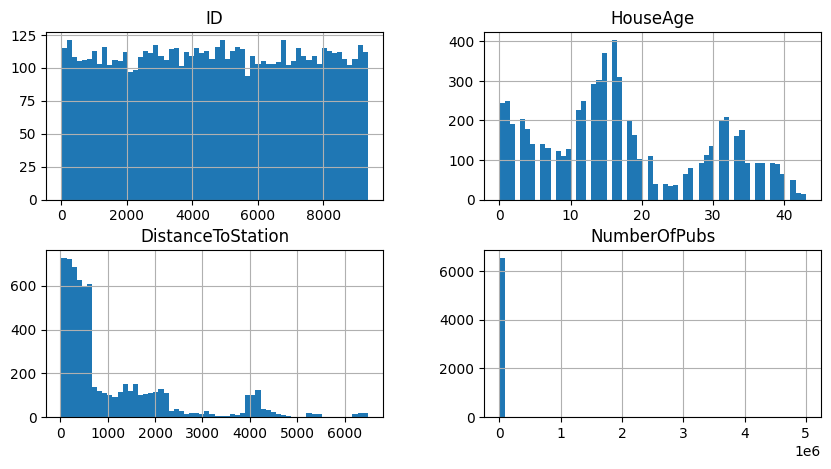

In [19]:
#Plot distributions
train.hist(figsize=(10,5),bins =60)

In [20]:
train[train['HousePrice'] == "??"]

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
8718,8718,2020.08,16.0,122.432508,5.0,5213.0,??


In [21]:
train = train[train['HousePrice'] != "??"]

In [22]:
train[train['HousePrice'] == "??"]

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice


In [23]:
train['HousePrice'] = train['HousePrice'].astype(float)

In [24]:
train.dtypes

ID                     int64
TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

<Axes: ylabel='HousePrice'>

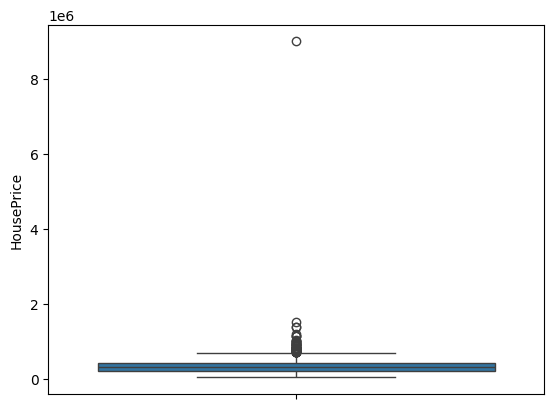

In [25]:
sns.boxplot(train['HousePrice'])

In [26]:
train.sort_values('HousePrice').tail(10)

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
9238,9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8445,8445,2021.05,0.0,276.789752,9.0,5222.0,8989772.0
8103,8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,8112,2019.08,20.0,370.088151,NaN,nan,NaN
7670,7670,2020.12,13.0,1837.649999,2.0,nan,NaN


In [27]:
train = train.drop(8445)

<Axes: ylabel='HousePrice'>

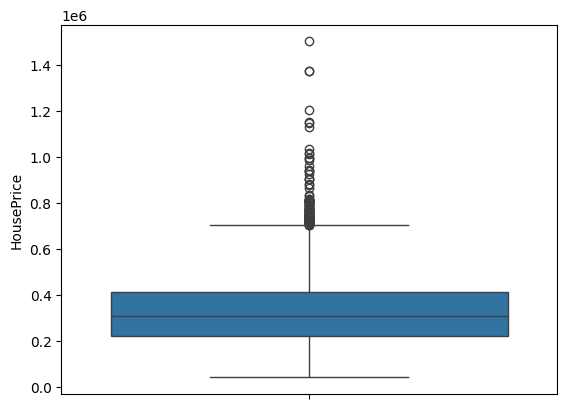

In [28]:
sns.boxplot(train['HousePrice'])

<Axes: ylabel='NumberOfPubs'>

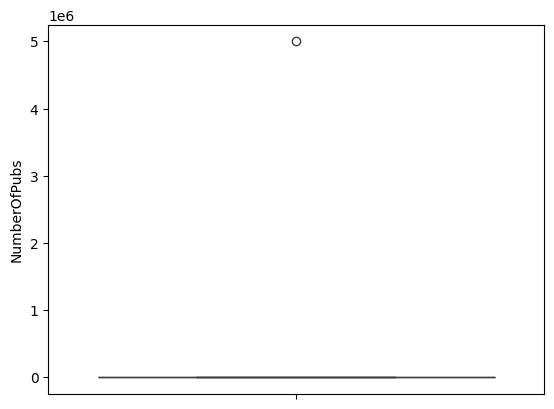

In [29]:
sns.boxplot(train['NumberOfPubs'])

In [30]:
train.sort_values('NumberOfPubs').tail(10)

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
5334,5334,2021.07,33.0,130.200701,10.0,5212.0,326772.0
4738,4738,2021.11,34.0,42.324197,10.0,5614.0,518639.0
1046,1046,2020.01,23.0,568.984852,10.0,5213.0,312165.0
6257,6257,2019.01,34.0,98.166618,10.0,5222.0,489487.0
2916,2916,2021.06,8.0,656.962289,10.0,5217.0,511688.0
422,422,2019.1,32.0,164.514773,10.0,5614.0,346126.0
5763,5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
13,13,2019.05,8.0,273.264542,4999999.0,5213.0,356012.0
2416,2416,2019.06,NaN,NaN,NaN,5222.0,268172.0
8112,8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [31]:
train = train.drop(13)

<Axes: ylabel='NumberOfPubs'>

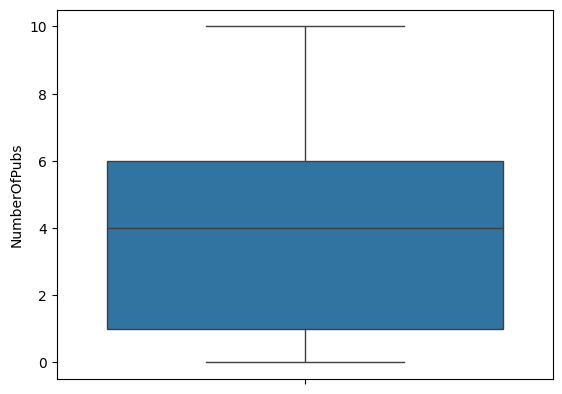

In [32]:
sns.boxplot(train['NumberOfPubs'])

<Axes: ylabel='DistanceToStation'>

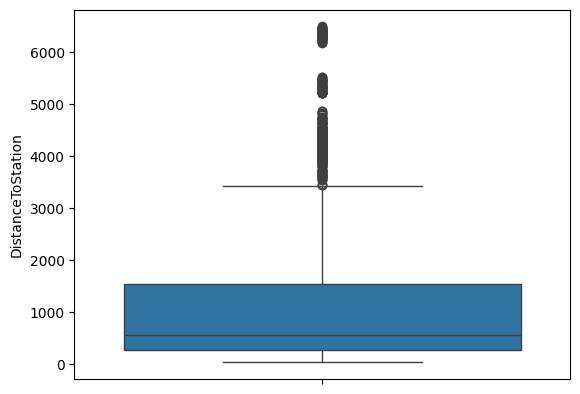

In [33]:
sns.boxplot(train['DistanceToStation'])

## Analyse Categorical Columns


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6546 entries, 8450 to 8915
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 6546 non-null   int64  
 1   TransactionDate    6546 non-null   object 
 2   HouseAge           6543 non-null   float64
 3   DistanceToStation  6544 non-null   float64
 4   NumberOfPubs       6544 non-null   float64
 5   PostCode           6546 non-null   object 
 6   HousePrice         6541 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 409.1+ KB


<Axes: xlabel='TransactionDate', ylabel='count'>

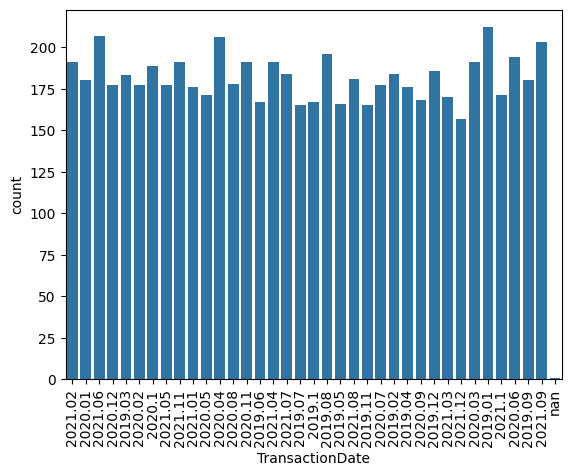

In [35]:

plt.xticks(rotation = 90)
sns.countplot(x='TransactionDate',data=train)


<Axes: xlabel='PostCode', ylabel='count'>

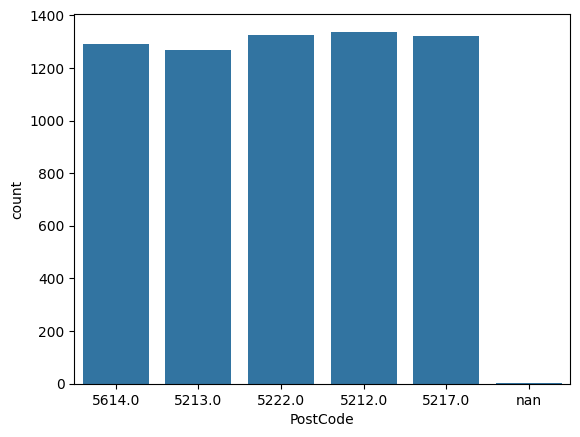

In [36]:
sns.countplot(x='PostCode',data=train)

## Analyse Reletionship Numeric/Numeric


In [37]:
train.corr(numeric_only=True)

,ID,HouseAge,DistanceToStation,NumberOfPubs,HousePrice
ID,1.000000,0.004486,0.013727,-0.024004,-0.010611
HouseAge,0.004486,1.000000,0.034074,0.044189,-0.156693
DistanceToStation,0.013727,0.034074,1.000000,-0.586704,-0.539859
NumberOfPubs,-0.024004,0.044189,-0.586704,1.000000,0.452309
HousePrice,-0.010611,-0.156693,-0.539859,0.452309,1.000000


<Axes: >

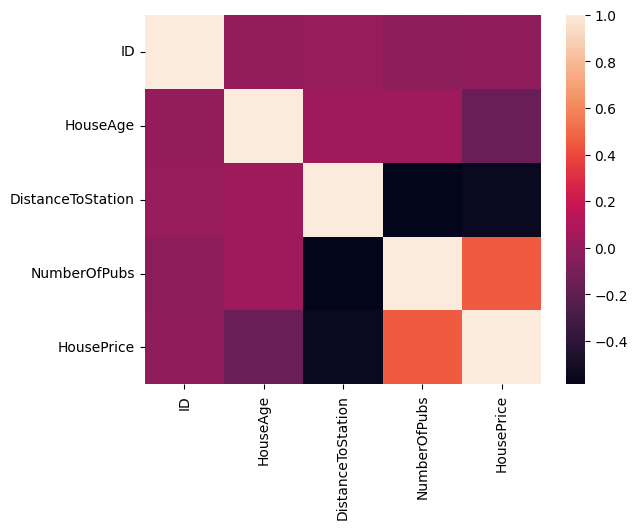

In [38]:
sns.heatmap(train.corr(numeric_only=True))

<Axes: xlabel='HouseAge', ylabel='HousePrice'>

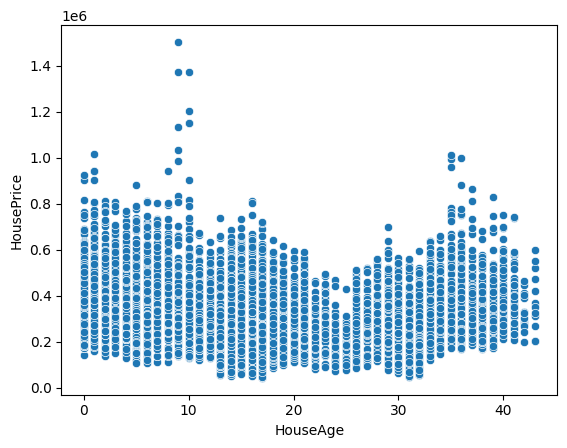

In [39]:
sns.scatterplot(x="HouseAge",y="HousePrice",data=train)

<Axes: xlabel='DistanceToStation', ylabel='HousePrice'>

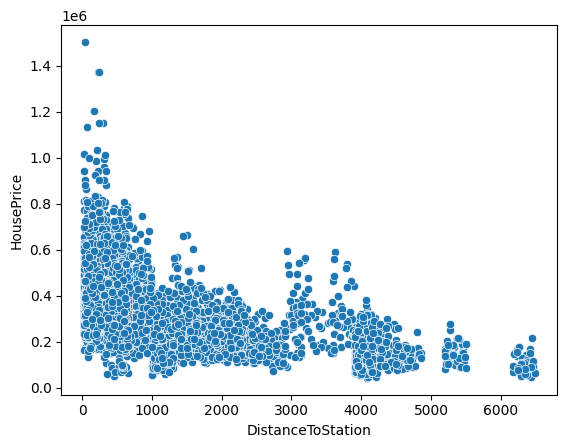

In [40]:
sns.scatterplot(x="DistanceToStation",y="HousePrice",data=train)

<Axes: xlabel='NumberOfPubs', ylabel='HousePrice'>

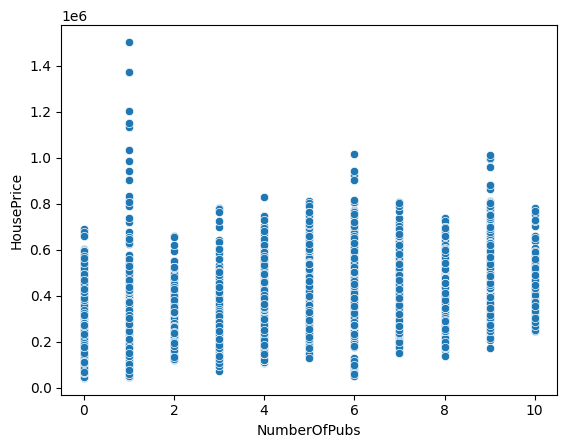

In [41]:
sns.scatterplot(x="NumberOfPubs",y="HousePrice",data=train)

## Analyse Reletionship categorial/Numeric


<Axes: xlabel='PostCode', ylabel='HousePrice'>

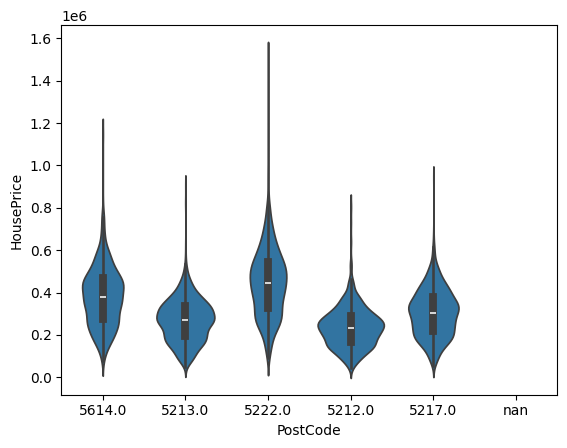

In [42]:
sns.violinplot(x='PostCode',y='HousePrice',data=train)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6546 entries, 8450 to 8915
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 6546 non-null   int64  
 1   TransactionDate    6546 non-null   object 
 2   HouseAge           6543 non-null   float64
 3   DistanceToStation  6544 non-null   float64
 4   NumberOfPubs       6544 non-null   float64
 5   PostCode           6546 non-null   object 
 6   HousePrice         6541 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 409.1+ KB


In [44]:
train = train[~train['HousePrice'].isnull()]

In [45]:
train.head()

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
8450,8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0
5758,5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0
4030,4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0
8447,8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0
4370,4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0


In [46]:
# train['YearSold'] = train['TransactionDate'].apply(lambda x : x[:4]).astype(int)
# train['MonthSold'] = train['TransactionDate'].apply(lambda x : x[5:]).astype(int)

In [47]:
# train['MonthSold'] = train['TransactionDate'].apply(lambda x : x[5:]).astype(int)

In [48]:
# train.drop(['TransactionDate'],inplace=True,axis=1)

In [49]:
# train.head()

In [50]:
train.dtypes

ID                     int64
TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

In [51]:
# sns.boxplot(x='YearSold',y='HousePrice',data=train)

In [52]:
# sns.boxplot(x='MonthSold',y='HousePrice',data=train)

In [53]:
train.head()

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
8450,8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0
5758,5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0
4030,4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0
8447,8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0
4370,4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6541 entries, 8450 to 8915
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 6541 non-null   int64  
 1   TransactionDate    6541 non-null   object 
 2   HouseAge           6539 non-null   float64
 3   DistanceToStation  6539 non-null   float64
 4   NumberOfPubs       6540 non-null   float64
 5   PostCode           6541 non-null   object 
 6   HousePrice         6541 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 408.8+ KB


In [55]:
train[train['HouseAge'].isnull()]

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
2416,2416,2019.06,NaN,NaN,NaN,5222.0,268172.0
24,24,2019.01,NaN,NaN,4.0,5217.0,137921.0


In [56]:
from sklearn.impute import SimpleImputer

In [57]:
imputer = SimpleImputer()

In [58]:
imputer.fit(train[['HouseAge','DistanceToStation','NumberOfPubs']])

SimpleImputer()

In [59]:
imputer.transform(train[train['HouseAge'].isnull()][['HouseAge','DistanceToStation','NumberOfPubs']])

array([[  17.37972167, 1091.84711209,    4.0735474 ],
       [  17.37972167, 1091.84711209,    4.        ]])

In [60]:
train.dtypes

ID                     int64
TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

# Example of onehotencoding


In [61]:
sample_df = pd.DataFrame(["O", "A", "B","AB"],columns=['Blood Group'])

In [62]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()

onehot.fit(sample_df[['Blood Group']])

sample_df[onehot.get_feature_names_out()] = onehot.transform(sample_df[['Blood Group']]).toarray()
sample_df.head()


,Blood Group,Blood Group_A,Blood Group_AB,Blood Group_B,Blood Group_O
0,O,0.0,0.0,0.0,1.0
1,A,1.0,0.0,0.0,0.0
2,B,0.0,0.0,1.0,0.0
3,AB,0.0,1.0,0.0,0.0


In [63]:
onehot = OneHotEncoder()

onehot.fit(train[['PostCode']])

onehot.transform(train[['PostCode']]).toarray()


array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [64]:
onehot.get_feature_names_out()

array(['PostCode_5212.0', 'PostCode_5213.0', 'PostCode_5217.0',
       'PostCode_5222.0', 'PostCode_5614.0'], dtype=object)

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator,TransformerMixin

In [91]:
class PreProcessor(BaseEstimator,TransformerMixin):
  def fit(self,X,y=None):

    self.imputer = SimpleImputer()
    self.imputer.fit(X[['HouseAge','DistanceToStation','NumberOfPubs']])

    self.scaler = StandardScaler()
    self.scaler.fit(X[['HouseAge','DistanceToStation','NumberOfPubs']])

    self.onehot = OneHotEncoder()
    self.onehot.fit(X[['PostCode']])

    return self
  

  def transform(self,X):

    imputed_cols = self.imputer.transform(X[['HouseAge','DistanceToStation','NumberOfPubs']])

    one_hot_cols = self.onehot.transform(X[['PostCode']])

    # print(imputed_cols)
    # print(one_hot_cols)
    tranform_df = X.copy()

    tranform_df['YearSold'] = tranform_df['TransactionDate'].apply(lambda x : x[:4]).astype(int)
    tranform_df['MonthSold'] = tranform_df['TransactionDate'].apply(lambda x : x[5:]).astype(int)
    tranform_df = tranform_df.drop('TransactionDate',axis = 1)

    tranform_df[['HouseAge','DistanceToStation','NumberOfPubs']] = imputed_cols
    tranform_df[['HouseAge','DistanceToStation','NumberOfPubs']] = self.scaler.transform(tranform_df[['HouseAge','DistanceToStation','NumberOfPubs']])

    tranform_df.drop('PostCode',axis=1,inplace= True)

    tranform_df[self.onehot.get_feature_names_out()] = one_hot_cols.toarray().astype(int)

    return tranform_df

In [92]:
preproc = PreProcessor()

In [93]:
preproc.fit(train)

PreProcessor()

In [94]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

In [95]:
preprocessed_df = preproc.transform(train)

In [96]:
preprocessed_df.head()

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice,YearSold,MonthSold,PostCode_5212.0,PostCode_5213.0,PostCode_5217.0,PostCode_5222.0,PostCode_5614.0
8450,1.449005,-0.496716,1.328375,460286.0,2021,2,0,0,0,0,1
5758,-0.033105,-0.375573,-0.363196,253332.0,2020,1,0,1,0,0,0
4030,1.449005,-0.634586,1.666689,486532.0,2021,6,0,0,0,0,1
8447,-1.515216,-0.705984,0.651746,595168.0,2020,12,0,0,0,1,0
4370,1.449005,-0.761991,1.328375,250495.0,2019,3,1,0,0,0,0


In [97]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6541 entries, 8450 to 8915
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HouseAge           6541 non-null   float64
 1   DistanceToStation  6541 non-null   float64
 2   NumberOfPubs       6541 non-null   float64
 3   HousePrice         6541 non-null   float64
 4   YearSold           6541 non-null   int32  
 5   MonthSold          6541 non-null   int32  
 6   PostCode_5212.0    6541 non-null   int32  
 7   PostCode_5213.0    6541 non-null   int32  
 8   PostCode_5217.0    6541 non-null   int32  
 9   PostCode_5222.0    6541 non-null   int32  
 10  PostCode_5614.0    6541 non-null   int32  
dtypes: float64(4), int32(7)
memory usage: 434.4 KB


# Modeling


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6541 entries, 8450 to 8915
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 6541 non-null   int64  
 1   TransactionDate    6541 non-null   object 
 2   HouseAge           6539 non-null   float64
 3   DistanceToStation  6539 non-null   float64
 4   NumberOfPubs       6540 non-null   float64
 5   PostCode           6541 non-null   object 
 6   HousePrice         6541 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 408.8+ KB


!pip


## ML dependencies


In [74]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from xgboost import XGBRegressor

In [98]:
piplines = {
  'ridge' : make_pipeline(PreProcessor(),Ridge()),
  'rf' : make_pipeline(PreProcessor(),RandomForestRegressor()),
  'gb' : make_pipeline(PreProcessor(),GradientBoostingRegressor()), 
  # 'xg' :make_pipeline(PreProcessor(),XGBRegressor()),
}

In [76]:
train.drop(['ID'],inplace=True,axis=1)

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6541 entries, 8450 to 8915
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionDate    6541 non-null   object 
 1   HouseAge           6539 non-null   float64
 2   DistanceToStation  6539 non-null   float64
 3   NumberOfPubs       6540 non-null   float64
 4   PostCode           6541 non-null   object 
 5   HousePrice         6541 non-null   float64
dtypes: float64(4), object(2)
memory usage: 357.7+ KB


# Create X and Y Dataframe


In [78]:
X_train = train.drop('HousePrice',axis=1)
y_train = train['HousePrice']

In [79]:
X_temp = preprocessed_df.drop('HousePrice',axis=1)
y_temp = preprocessed_df['HousePrice']

In [80]:
rigmodel = Ridge()

In [81]:
rigmodel.fit(X_temp,y_temp)

Ridge()

In [82]:
rigmodel.predict(X_temp)

array([452565.68110926, 280854.91749814, 474043.53350501, ...,
       305144.81231278, 350019.36110534, 301236.66537048])

In [83]:
y_temp

8450    460286.0
5758    253332.0
4030    486532.0
8447    595168.0
4370    250495.0
          ...   
664     301492.0
7540    174239.0
7221    327666.0
1318    392231.0
8915    213263.0
Name: HousePrice, Length: 6541, dtype: float64

In [84]:
piplines['ridge'].get_params()

{'memory': None,
 'steps': [('preprocessor', PreProcessor()), ('ridge', Ridge())],
 'verbose': False,
 'preprocessor': PreProcessor(),
 'ridge': Ridge(),
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

In [99]:
grid = {
  'ridge' : {'ridge__alpha' : [0.05,0.25,0.5,1.0]},
  'rf' : {
    'randomforestregressor__n_estimators' : [100,200,300],
    'randomforestregressor__max_depth' : [5,6,7,None]
  },
  'gb' : {
    "gradientboostingregressor__n_estimators" : [100,200,300],
    "gradientboostingregressor__max_depth" : [5,6,7,None]
  },
  # 'xg' :{
  #   "xgbregressor__n_estimators": [100,200,300],
  #   "xgbregressor__max_depth" : [5,6,7,None]
  # }
}

In [86]:
from sklearn.model_selection import GridSearchCV/

In [87]:
piplines

{'ridge': Pipeline(steps=[('preprocessor', PreProcessor()), ('ridge', Ridge())]),
 'rf': Pipeline(steps=[('preprocessor', PreProcessor()),
                 ('randomforestregressor', RandomForestRegressor())]),
 'gb': Pipeline(steps=[('preprocessor', PreProcessor()),
                 ('gradientboostingregressor', GradientBoostingRegressor())]),
 'xg': Pipeline(steps=[('preprocessor', PreProcessor()),
                 ('xgbregressor',
                  XGBRegressor(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_ra

In [88]:
X_train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
8450,2021.02,34.0,460.994365,8.0,5614.0
5758,2020.01,17.0,614.851833,3.0,5213.0
4030,2021.06,34.0,285.892687,9.0,5614.0
8447,2020.12,0.0,195.213314,6.0,5222.0
4370,2019.03,34.0,124.082230,8.0,5212.0


In [100]:
fit_models = {}

for algo,pipeline in piplines.items():
  print(algo)
  model = GridSearchCV(pipeline,grid[algo],n_jobs=-1,cv=10,scoring="r2")
  model.fit(X_train,y_train)
  fit_models[algo] = model


ridge
rf
gb


In [101]:
fit_models

{'ridge': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('preprocessor', PreProcessor()),
                                        ('ridge', Ridge())]),
              n_jobs=-1, param_grid={'ridge__alpha': [0.05, 0.25, 0.5, 1.0]},
              scoring='r2'),
 'rf': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('preprocessor', PreProcessor()),
                                        ('randomforestregressor',
                                         RandomForestRegressor())]),
              n_jobs=-1,
              param_grid={'randomforestregressor__max_depth': [5, 6, 7, None],
                          'randomforestregressor__n_estimators': [100, 200,
                                                                  300]},
              scoring='r2'),
 'gb': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('preprocessor', PreProcessor()),
                                        ('gradientboostingregressor',
                                      

## Evaluate Models


In [149]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [106]:
X_train.columns

Index(['TransactionDate', 'HouseAge', 'DistanceToStation', 'NumberOfPubs',
       'PostCode'],
      dtype='object')

In [104]:
test.columns

Index(['ID', 'TransactionDate', 'HouseAge', 'DistanceToStation',
       'NumberOfPubs', 'PostCode', 'HousePrice'],
      dtype='object')

In [117]:
X_test.columns

Index(['TransactionDate', 'HouseAge', 'DistanceToStation', 'NumberOfPubs',
       'PostCode'],
      dtype='object')

In [131]:
test.isnull().sum()

ID                   0
TransactionDate      1
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           2
dtype: int64

In [132]:
test = test[~test.HousePrice.isnull()]

In [133]:
test.isnull().sum()

ID                   0
TransactionDate      0
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           0
dtype: int64

In [134]:
test.dropna(inplace=True)

In [135]:
test.isnull().sum()

ID                   0
TransactionDate      0
HouseAge             0
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           0
dtype: int64

In [136]:
test.dtypes

ID                     int64
TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [137]:
test = test[test['HousePrice'] != '??']

In [140]:
test['HousePrice'] = test['HousePrice'].astype(float)
test['TransactionDate'] = test['TransactionDate'].astype(str)
test['PostCode'] = test['PostCode'].astype(str)

In [141]:
test.dtypes

ID                     int64
TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

In [142]:
X_test = test.drop(['HousePrice','ID'],axis = 1)
y_test = test['HousePrice']

In [143]:
X_test.isnull().sum()

TransactionDate      0
HouseAge             0
DistanceToStation    0
NumberOfPubs         0
PostCode             0
dtype: int64

In [145]:
X_test.shape

(2802, 5)

In [147]:
y_test.shape

(2802,)

In [144]:
test.head()

,ID,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
7857,7857,2021.11,0.0,267.000535,6.0,5222.0,919497.0
1641,1641,2021.04,12.0,500.080510,5.0,5212.0,283680.0
3620,3620,2019.07,14.0,4024.663391,0.0,5614.0,135818.0
2820,2820,2020.09,18.0,568.954185,4.0,5614.0,468742.0
1572,1572,2020.07,11.0,44.210016,1.0,5614.0,311065.0


In [151]:
for algo,model in fit_models.items():
  yhat = model.predict(X_test)
  r2 = r2_score(y_test,yhat)
  mae = mean_absolute_error(y_test,yhat)
  print(f'{algo} -- R2 score : {r2} , Mae Score : {mae}')

ridge -- R2 score : 0.669150711282787 , Mae Score : 62589.05055662937
rf -- R2 score : 0.8221793336336669 , Mae Score : 44421.84499643112
gb -- R2 score : 0.8636450977663568 , Mae Score : 38613.30496895846


In [152]:
model = fit_models['gb']

In [153]:
y_hat = model.predict(X_test)

In [156]:
result_df = pd.DataFrame(y_test)

In [159]:
result_df['y_hat'] = y_hat


In [161]:
result_df['delta'] = result_df.HousePrice.astype(float) - result_df['y_hat']

In [162]:
result_df.to_csv("results.csv")

In [164]:
!pip install dill

  Obtaining dependency information for dill from https://files.pythonhosted.org/packages/c9/7a/cef76fd8438a42f96db64ddaa85280485a9c395e7df3db8158cfec1eee34/dill-0.3.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/116.3 kB ? eta -:--:--
   --- ------------------------------------ 10.2/116.3 kB ? eta -:--:--
   ------------- ------------------------- 41.0/116.3 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 116.3/116.3 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [165]:
import dill

In [166]:
model = fit_models['gb']

In [167]:
with open('gb.pkl','wb') as f:
  dill.dump(model,f)